In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp
sp.init_printing()

In [31]:
mpl.rcParams["figure.dpi"] = 150

## Model for speed as function of slope

We assume that the air drag is proportional to $v^2$, so we have $F \sim v^2 \Rightarrow W = F \Delta x \sim v^2 \Delta x = v^3 \Delta t$ and $P = \frac{\Delta W}{\Delta t} \sim v^3$.

For elevation, we have that $W = mg \Delta h = mgs \Delta x = 0.01mgsv \Delta t$, such that $P = 0.01mgsv$ where $s$ is the slope in $\%$ (vertical meters up for each horizontal 100 meter traveled)

We have that: $P= Kv^3+0.01mgsv$. By inverting this we find speed as a function of power:

In [6]:
P, v, K, b = sp.symbols("P, v, K, b")
eqn = K*v**3+b*v-P
velocity = sp.solve(eqn, v)

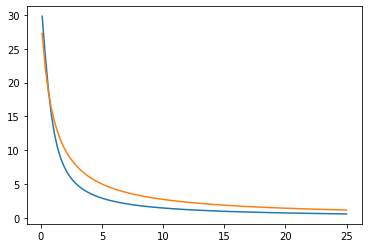

In [27]:
fig, ax = plt.subplots(1,1)

M = 70       # the mass of the person
K_val = 3e-3 # the value for K
P_val = 100  # the power output of the person

S = np.linspace(0.1, 25, 100)
B = 0.01*70*9.81*S     # for a person weighing 70 kg

vel_sym = velocity[2].subs({K: 3e-3, P: 100})
vel_num = sp.lambdify(b, vel_sym, "numpy")

V = vel_num(B)

ax.plot(S, V)
ax.plot(S, 30/(S**(1)+1))

plt.show()

conclusion: $v \sim \frac{1}{1+s}$ is good enough for positive slopes

for negative slopes we suppose a minamal speed $v_{min}$, with extra speed because of the descent. This extra speed is calculated using $bsv=Kv^3 \Leftrightarrow v_{extra} \sim \sqrt{s}$

Text(0, 0.5, 'snelheid (km/h)')

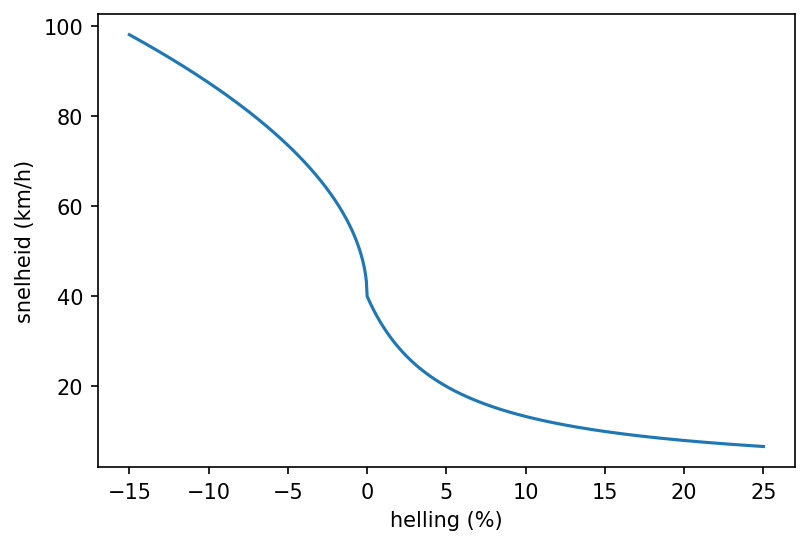

In [40]:
v_min = 40

def v_pos(s, k=0.2, v_min=40):
    return v_min/(1+k*s)
def v_neg(s, l=15, v_min=40):
    return v_min + l*np.sqrt(-s)

S0 = np.linspace(-15, 0, 300)
S1 = np.linspace(0, 25, 500)
S = np.concatenate((S0, S1))

V0 = v_neg(S0, l=15)
V1 = v_pos(S1, k=0.2)
V = np.concatenate((V0, V1))

fig, ax = plt.subplots(1,1)

ax.plot(S, V)
ax.set_xlabel("helling (%)")
ax.set_ylabel("snelheid (km/h)")

In [41]:
display(v_neg(-5, l=15), v_neg(-10, l=15))